## C-Section Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
caesarian = pd.read_csv('caesarian.csv')
df = pd.DataFrame(caesarian)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
age                80 non-null int64
delivery_number    80 non-null int64
delivery_time      80 non-null int64
blood_pressure     80 non-null int64
heart_problem      80 non-null int64
caesarian          80 non-null int64
dtypes: int64(6)
memory usage: 3.8 KB


In [4]:
df.head()

,age,delivery_number,delivery_time,blood_pressure,heart_problem,caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [5]:
df.describe()

,age,delivery_number,delivery_time,blood_pressure,heart_problem,caesarian
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.637500,1.000000,0.375000,0.575000
std,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


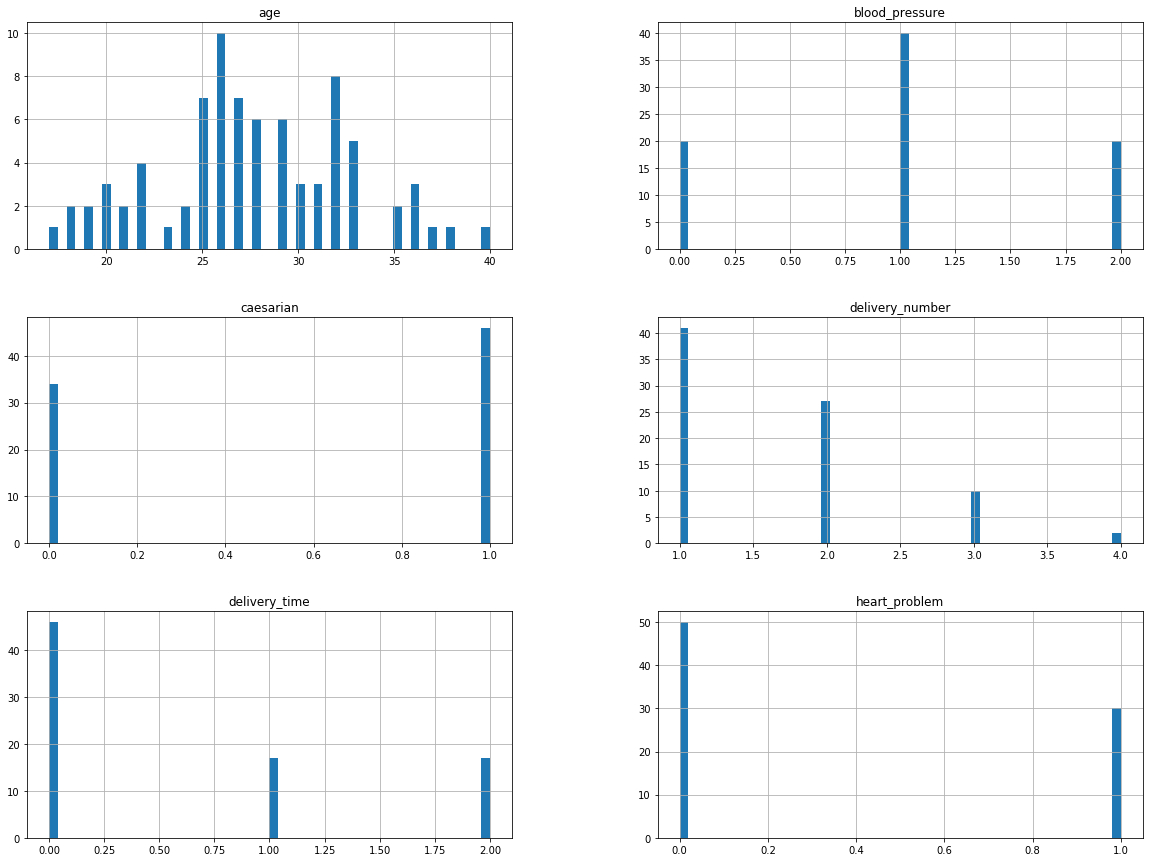

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

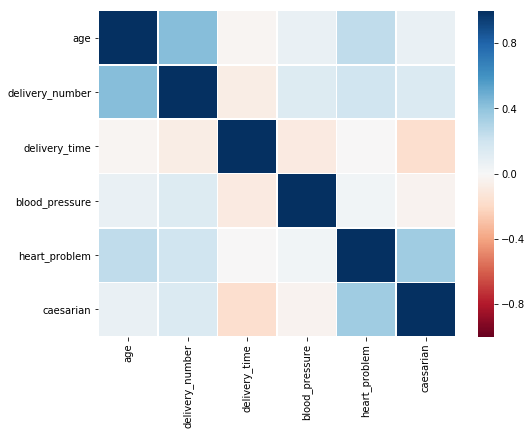

In [8]:
corr_matrix = df.corr()
a=False
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, 
            vmin = -1, vmax = 1,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            linewidths=.5,
            cmap = 'RdBu')

In [9]:
df[df.isnull().any(axis=1)]

,age,delivery_number,delivery_time,blood_pressure,heart_problem,caesarian


In [10]:
from sklearn.preprocessing import OneHotEncoder
delivery_time_ohe = OneHotEncoder()
blood_pressure_ohe = OneHotEncoder()
X = delivery_time_ohe.fit_transform(df.delivery_time.values.reshape(-1,1)).toarray()
Xm = blood_pressure_ohe.fit_transform(df.blood_pressure.values.reshape(-1,1)).toarray()

/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can spe

In [11]:
times = ['timely', 'premature', 'latecomer']
dfOneHot = pd.DataFrame(X, columns = ["delivery_time_"+times[i] for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)

pressure = ['low' , 'normal', 'high']
dfOneHot = pd.DataFrame(Xm, columns = ["blood_pressure_"+pressure[i] for i in range(X.shape[1])])
df = pd.concat([df, dfOneHot], axis=1)

In [12]:
df.head()

,age,delivery_number,delivery_time,blood_pressure,heart_problem,caesarian,delivery_time_timely,delivery_time_premature,delivery_time_latecomer,blood_pressure_low,blood_pressure_normal,blood_pressure_high
0,22,1,0,2,0,0,1.0,0.0,0.0,0.0,0.0,1.0
1,26,2,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0
2,26,2,1,1,0,0,0.0,1.0,0.0,0.0,1.0,0.0
3,28,1,0,2,0,0,1.0,0.0,0.0,0.0,0.0,1.0
4,22,2,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0


## Prepare Data for machine learning algorithms

In [13]:
# define explanatory and response variable
y = df['caesarian']
X = df.drop(['caesarian'], axis = 1)

In [14]:
# create a training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lr, X_train, y_train, cv=3)

/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_train, y_train, cv=3, scoring="accuracy")

/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.64285714, 0.61538462, 0.69230769])

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[ 8,  8],
       [ 6, 18]])

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

ps = precision_score(y_train, y_train_pred)
rs = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
acc = accuracy_score(y_train, y_train_pred)


print("Accuracy: " + str(acc))
print("Precision Score: " + str(ps))
print("Recall Score: " + str(rs))
print("F1 Score: " + str(f1))

Accuracy: 0.65
Precision Score: 0.6923076923076923
Recall Score: 0.75
F1 Score: 0.7199999999999999


In [20]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(lr, X_train, y_train, cv=3,
                             method="decision_function")

/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

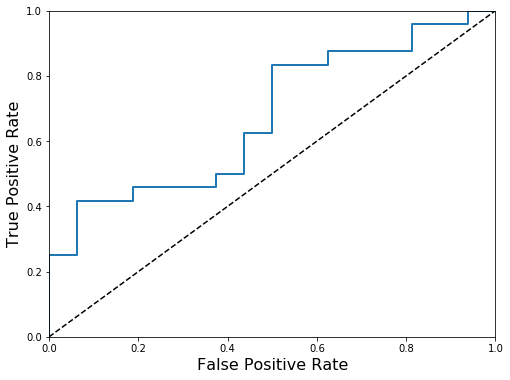

In [22]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

## Decision Tree

## Random Forest

In [23]:
# create a training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,random_state=0)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [25]:
for name, score in zip(df.columns.values.tolist(), rnd_clf.feature_importances_):
    print(name, score)

age 0.3747509071252809
delivery_number 0.12271916128254182
delivery_time 0.05911723924566977
blood_pressure 0.06427459757415176
heart_problem 0.09885224439339997
caesarian 0.03778549416090885
delivery_time_timely 0.047389910131379304
delivery_time_premature 0.01951202636002184
delivery_time_latecomer 0.041792250401870644
blood_pressure_low 0.10203922662259067
blood_pressure_normal 0.031766942702184574


In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.42857143, 0.46153846, 0.53846154])

In [27]:
from sklearn.model_selection import cross_val_score
y_train_pred_rnd = cross_val_predict(rnd_clf, X_train, y_train, cv=3)

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_rnd)

array([[ 7,  9],
       [12, 12]])

In [29]:
ps = precision_score(y_train, y_train_pred_rnd)
rs = recall_score(y_train, y_train_pred_rnd)
f1 = f1_score(y_train, y_train_pred_rnd)
acc = accuracy_score(y_train, y_train_pred_rnd)

print("Accuracy: " + str(acc))
print("Precision Score: " + str(ps))
print("Recall Score: " + str(rs))
print("F1 Score: " + str(f1))

Accuracy: 0.475
Precision Score: 0.5714285714285714
Recall Score: 0.5
F1 Score: 0.5333333333333333


In [30]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(lr, X_train, y_train_pred_rnd, cv=3,
                             method="decision_function")

/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_pred_rnd, y_scores)

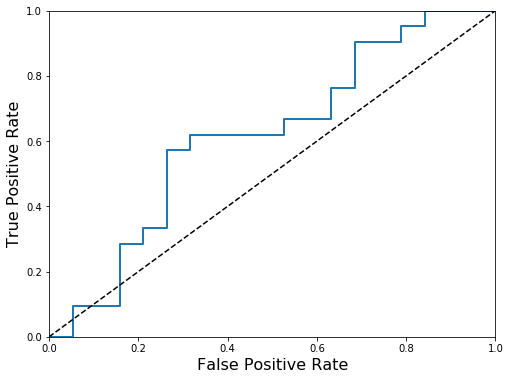

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

## Model Tuning

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(1,11,5))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.1s finished
/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
best_clf.best_estimator_

Pipeline(memory=None,
     steps=[('classifier', LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

## Final Model

In [35]:
lr_final = LogisticRegression(C=0.615848211066026, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [36]:
lr_final = LogisticRegression()
lr_final.fit(X_train, y_train)
y_pred_lr_final = lr.predict(X_test)

/home/bryn/anaconda3/envs/universe/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_lr_final)

array([[ 8, 10],
       [ 5, 17]])

In [38]:
ps = precision_score(y_test, y_pred_lr_final)
rs = recall_score(y_test, y_pred_lr_final)
f1 = f1_score(y_test, y_pred_lr_final)
acc = accuracy_score(y_test, y_pred_lr_final)

print("Accuracy: " + str(acc))
print("Precision Score: " + str(ps))
print("Recall Score: " + str(rs))
print("F1 Score: " + str(f1))

Accuracy: 0.625
Precision Score: 0.6296296296296297
Recall Score: 0.7727272727272727
F1 Score: 0.6938775510204083
